Analiza podatkov


In [12]:
import pandas as pd
pd.options.display.max_rows = 20

In [13]:
vsi_podatki = pd.read_csv("tabele/bike_podatki.csv")
cene = vsi_podatki["cena"]
prave_cene = []
for c in cene:
    c = c[:-2]
    if "." in c:
        c = c.split(".")
        c = c[0] + c[1]
    try:
        c = int(c)
    except ValueError:
        c = None
    prave_cene.append(c)
vsi_podatki["prava_cena"] = prave_cene
vsi_podatki

,naslov,cena,starost,proizvajalec,letnik,velikost okvirja,material,velikost obročev,dolžina opisa,kategorija,posodobljeno,ogledi,prava_cena
0,Capra Core 2 2023,1.800 €,Rabljeno,YT,2023,L,Aluminij,29 col,407,Enduro kolesa,09.10.2025,47,1800.0
1,COMMENCAL CLASH RIDE 2021 LARGE,2.300 €,Rabljeno,Commencal,2021,L,Aluminij,27.5 col (650b),1240,Enduro kolesa,26.09.2025,242,2300.0
2,specialized status,1.200 €,Rabljeno,Specialized,2020,L,Aluminij,Mullet (29 in 27.5),462,Enduro kolesa,28.09.2025,276,1200.0
3,Bergamont roxter 8.0,550 €,Rabljeno,Bergamont,2020,S,Aluminij,27.5 col (650b),97,Prednje vzmetena / XC kolesa,06.09.2025,129,550.0
4,Lapierre Spicy 7.9,2.300 €,Rabljeno,Lapierre,2020,M,Karbon,29 col,650,Enduro kolesa,16.09.2025,62,2300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
883,specialized enduro 2019 29’,800 €,Rabljeno,Specialized,2019,L,Aluminij,29 col,909,Enduro kolesa,21.07.2025,905,800.0
884,Trek slash 7,1.750 €,Rabljeno,Trek,2022,M,Aluminij,29 col,119,Enduro kolesa,07.10.2025,399,1750.0
885,Giant Trance X 1 2021 M size,1.400 €,Rabljeno,Giant,2021,M,Aluminij,29 col,75,Gorska kolesa,21.07.2025,290,1400.0
886,Pivot Firebird,1.850 €,Rabljeno,Pivot,2018,L,Karbon,27.5 col (650b),343,Trail in All-Mountain kolesa,26.09.2025,65,1850.0


Povprečna cena po kategorijah:

Text(0, 0.5, 'Cena [€]')

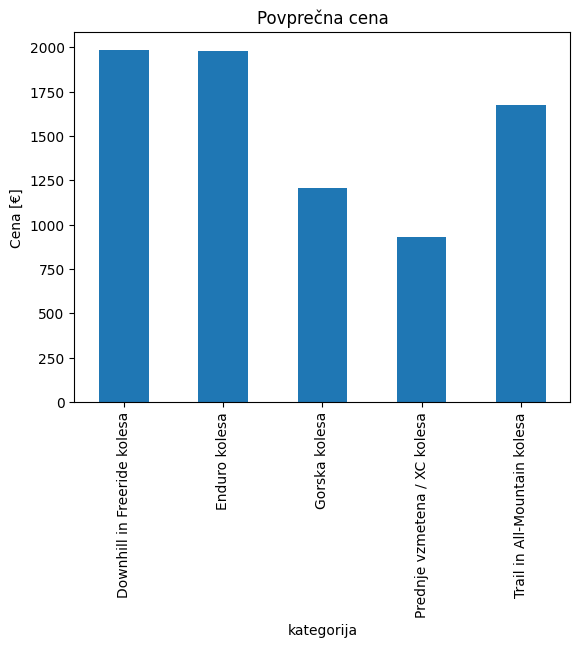

In [62]:
kolesa_po_kategorijah = vsi_podatki.groupby("kategorija")

povprecje_kategorije = kolesa_po_kategorijah.prava_cena.mean().round(2)

ax = povprecje_kategorije.plot(kind="bar",  title="Povprečna cena").set_ylabel("Cena [€]")  
ax

Kolikšen procent trga predstavlja določena kategorija? Prikažemo s tortnim diagramom.

Text(0.5, 1.0, 'odstotek trga')

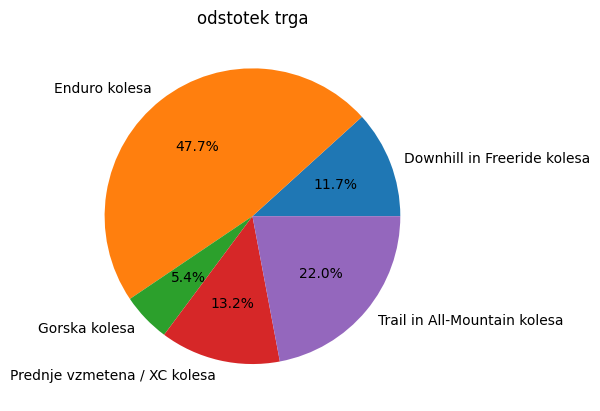

In [ ]:
vsi_podatki_kategorije = kolesa_po_kategorijah.prava_cena.sum().sort_values(ascending=False)
ax = vsi_podatki_kategorije.plot(kind="pie", autopct='%.1f%%') 
ax.set_ylabel("")
ax.set_title("odstotek trga")

Povprečna cena po materialu:

Text(0, 0.5, 'Cena [€]')

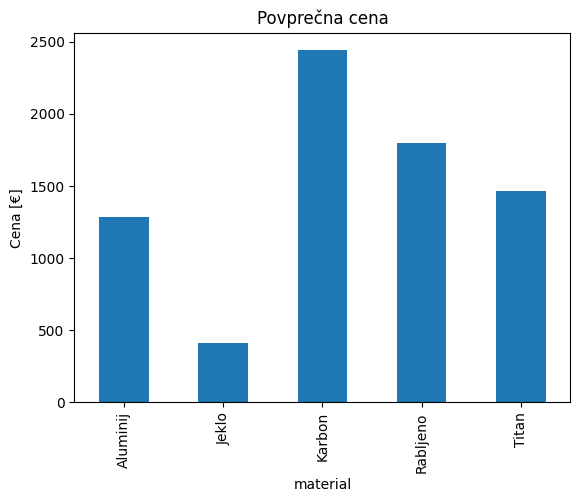

In [69]:
kolesa_po_materialu = vsi_podatki.groupby("material")
povprecje_po_materialu = kolesa_po_materialu.prava_cena.mean().round(2)
ax = povprecje_po_materialu.plot(kind="bar",  title="Povprečna cena").set_ylabel("Cena [€]")  
ax

Povprečna cena po velikosti:

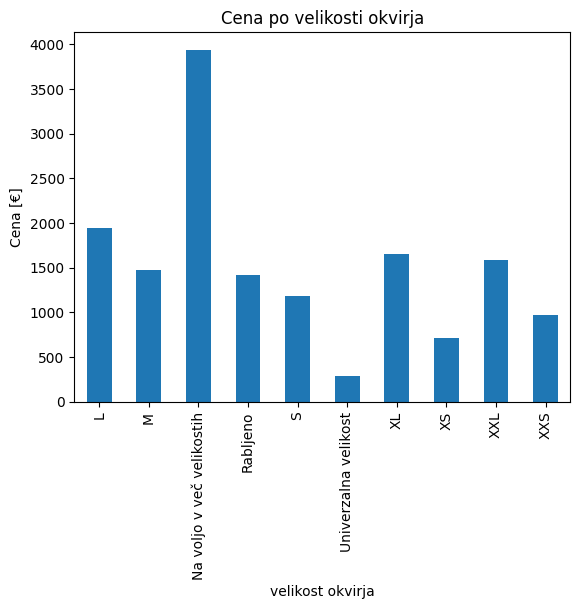

In [ ]:
kolesa_po_velikosti = vsi_podatki.groupby("velikost okvirja")
kolesa_po_velikosti = kolesa_po_velikosti.prava_cena.mean().round(2)
ax = kolesa_po_velikosti.plot(kind="bar",  title="Povprečna cena po velikosti okvirja").set_ylabel("Cena [€]")  


Povprečna cena po proizvajalcih:

Text(0.5, 1.0, 'Povprečna cena znamke')

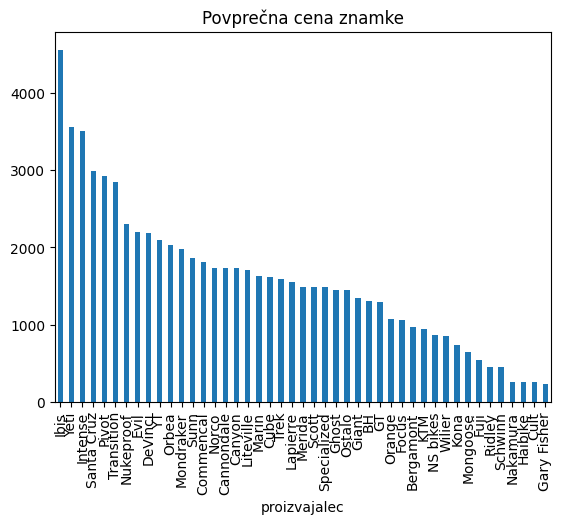

In [75]:
kolesa_po_proizvajalcih = vsi_podatki.groupby("proizvajalec")
kolesa_po_proizvajalcih = kolesa_po_proizvajalcih.prava_cena.mean().round(2).sort_values(ascending=False)
ax = kolesa_po_proizvajalcih.plot(kind="bar") 

ax.set_title("Povprečna cena znamke")

Da se bo bolje videlo dajmo v graf prvih 10 in zadnjih 10

Text(0.5, 1.0, 'Povprečna cena znamke')

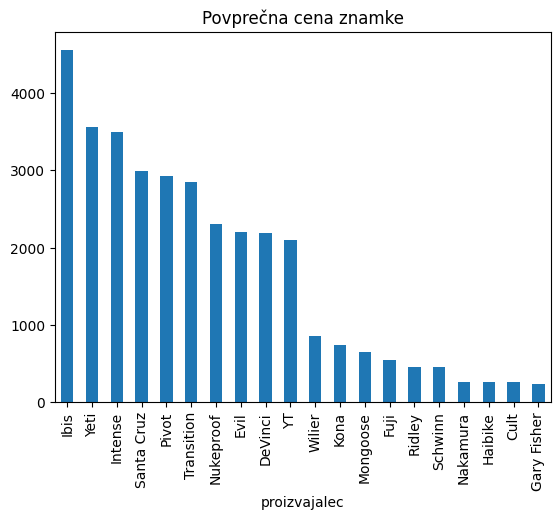

In [80]:
kolesa_po_proizvajalcih = vsi_podatki.groupby("proizvajalec")
kolesa_po_proizvajalcih =pd.concat([ kolesa_po_proizvajalcih.prava_cena.mean().round(2).sort_values(ascending=False).head(10),kolesa_po_proizvajalcih.prava_cena.mean().round(2).sort_values(ascending=False).tail(10)])
ax = kolesa_po_proizvajalcih.plot(kind="bar") 

ax.set_title("Povprečna cena znamke")

koliko koles je v katerem cenovnem razredu (po 500)

Text(0.5, 1.0, 'procent koles v cenovnem razredu')

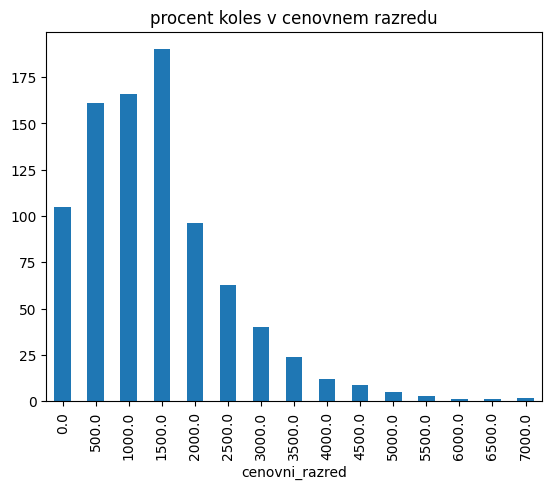

In [82]:
vsi_podatki["cenovni_razred"] = (vsi_podatki["prava_cena"]//500)*500
kolesa_po_razredih = vsi_podatki.groupby("cenovni_razred")
kolesa_po_razredih = kolesa_po_razredih.size()
ax = kolesa_po_razredih.plot(kind="bar") 
ax.set_title("procent koles v cenovnem razredu")

Kakšna je pa dolžina opisa, glede na cenovni razred? So opisi daljši za dražja kolesa?

In [24]:
opis_po_razredih = kolesa_po_razredih["dolžina opisa"].mean().sort_values(ascending=False)
opis_po_razredih

cenovni_razred
7000.0    2452.500000
6500.0    1983.000000
5500.0    1030.000000
6000.0     977.000000
4500.0     911.222222
5000.0     826.400000
3500.0     682.625000
4000.0     634.583333
3000.0     634.225000
1500.0     584.205263
2500.0     546.650794
2000.0     513.208333
1000.0     426.698795
500.0      365.571429
0.0        223.266667
Name: dolžina opisa, dtype: float64

Število ogledov povezano s ceno (ker so dragi zanimivi) ali z dolžino opisa?

In [23]:
ogledi_po_razredih = kolesa_po_razredih.ogledi.mean().sort_values(ascending=False)
ogledi_po_razredih

cenovni_razred
6500.0    574.000000
4000.0    396.250000
5000.0    382.800000
2000.0    300.166667
3000.0    286.900000
500.0     278.826087
2500.0    276.301587
1000.0    263.030120
1500.0    236.615789
3500.0    228.291667
4500.0    198.333333
7000.0    192.500000
0.0       186.142857
5500.0    186.000000
6000.0    162.000000
Name: ogledi, dtype: float64

Poglejmo skupen graf ogledov in dolžine opisa, kako (če sploh) vpliva dolžina opisa na število ogledov. Predvidevam, da daljši opis prinese več ogledov. 

<Axes: xlabel='cenovni_razred'>

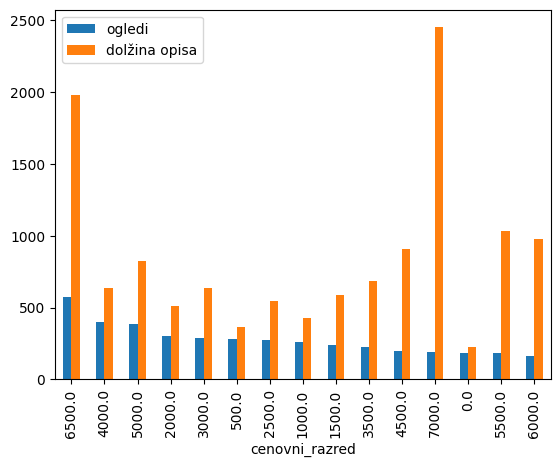

In [ ]:
ogledi_in_opis_po_razredih = pd.merge( ogledi_po_razredih, opis_po_razredih, on="cenovni_razred").round(0)

ogledi_in_opis_po_razredih.plot(kind="bar")

zgleda da ni prave koleracije med številom ogledov in dolžino opisa. So pa oglasi različno stari, imamo samo podatek zadne posodobitve (ki je lahko prva lahko pa ne) dodajmo "indeks starosti-ogledov", ki ga definirajmo kot ogledi/starost

<Axes: title={'center': 'Indeksi po cenovnih razredih (opis deljen s 100)'}, xlabel='Cenovni razred', ylabel='Vrednosti'>

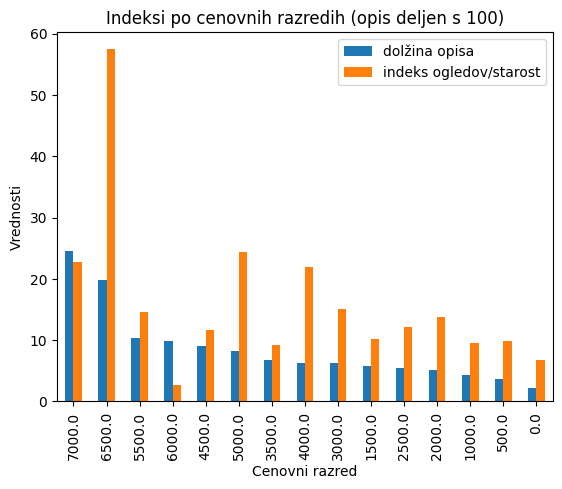

In [51]:
vsi_podatki['posodobljeno'] = pd.to_datetime(vsi_podatki['posodobljeno'], format='%d.%m.%Y')
referencni_datum = pd.to_datetime('20.10.2025', format='%d.%m.%Y')
vsi_podatki["starost"] = (referencni_datum - vsi_podatki["posodobljeno"]).dt.days
#vsi_podatki[["posodobljeno","starost"]]
vsi_podatki["indeks ogledov/starost"] = vsi_podatki["ogledi"] / vsi_podatki["starost"]
#vsi_podatki["indeks ogledov/starost"]
indeks_po_razredih = vsi_podatki.groupby("cenovni_razred")["indeks ogledov/starost"].mean().sort_values(ascending=False)

ax = pd.merge(opis_po_razredih/100,indeks_po_razredih, on="cenovni_razred").round(1).plot(kind="bar")

ax.set_title('Indeksi po cenovnih razredih (opis deljen s 100)')
ax.set_xlabel('Cenovni razred')
ax.set_ylabel('Vrednosti')
ax

Tukaj vidimo, da indeks rahlo pada z dolžino opisa, je pa tudi za upoštevati, da oglasi ki so imeli ceno posodobljeno, je cena nižja kot prejšnja,to pomeni, da je zato pri manjših vrednostih indeks ogledov/starost večji.